Импортируем нужные библиотеки

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Читаем наш датасет

In [50]:
df_spoti = pd.read_csv('songs_normalize.csv')
df_spoti.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Обобщенно посмотрим на данные

In [51]:
df_spoti.shape
df_spoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Проверим датасет на пропуски

In [52]:
df_spoti.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

Нам повезло, и пропусков нет! Проверим на дубликаты

In [53]:
df_spoti.duplicated().sum()

59

Было принято решение не убирать повторяющиеся строки из датасета, так как это уже на первых стадиях анализа влияло на распределение самых популярных артистов и др. Посмотрим какие артисты чаще всего упомитаются в чартах спотифай

In [54]:
most_popular_artists = df_spoti['artist'].value_counts()
most_popular_artists

artist
Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

Построим график топ-20 самых упоминаемых в чартах артистов

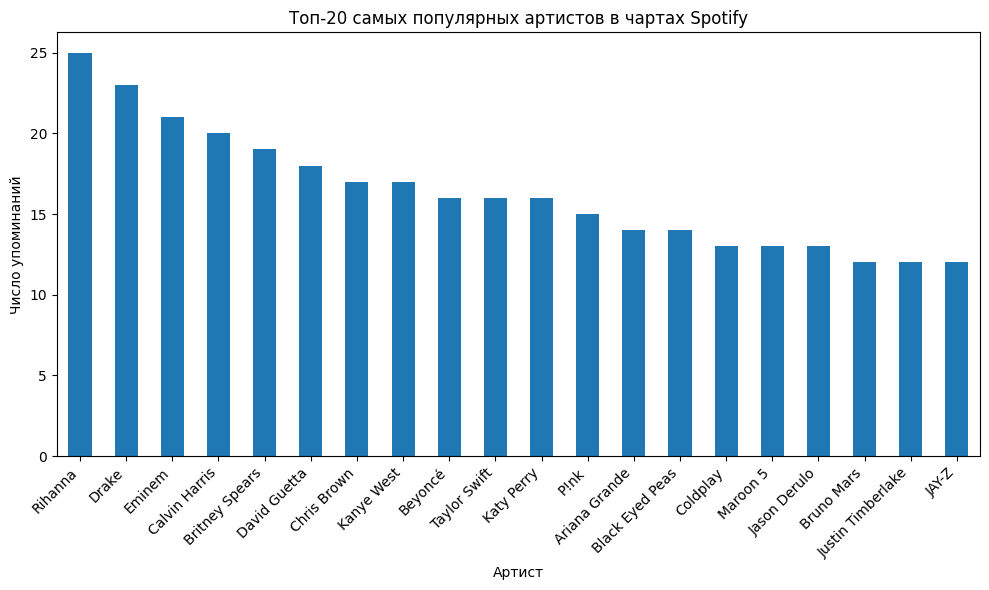

In [55]:
plt.figure(figsize=(10, 6))
most_popular_artists.head(20).plot(kind='bar')
plt.title('Топ-20 самых популярных артистов в чартах Spotify')
plt.xlabel('Артист')
plt.ylabel('Число упоминаний')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Теперь посмотрим на то, сколько хитов попадало в чарты Spotify каждый год и построим по этим данным график

In [56]:
songs_in_time = df_spoti['year'].value_counts().sort_index()
songs_in_time

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: count, dtype: int64

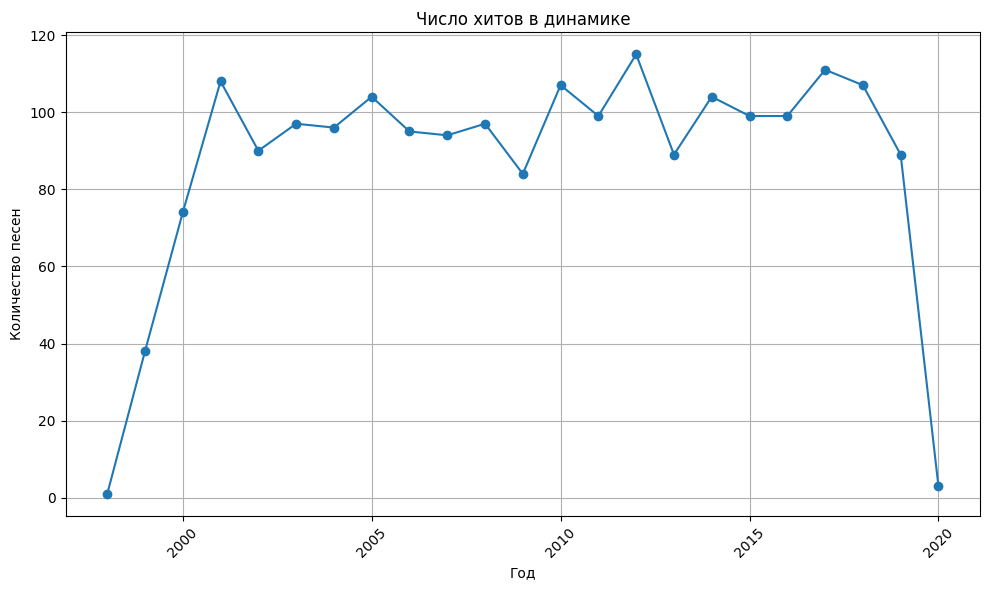

In [57]:
plt.figure(figsize=(10, 6))
songs_in_time.plot(marker='o', linestyle='-')
plt.title('Число хитов в динамике')
plt.xlabel('Год')
plt.ylabel('Количество песен')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Для удобства переведем продолжительность песен из миллисекунд в минуты, и посмотрим, как менялась продолжительность треков, построим график

In [58]:
df_spoti['duration_min'] = df_spoti['duration_ms'] / (1000 * 60)
average_duration_by_year = df_spoti.groupby('year')['duration_min'].mean()
average_duration_by_year

year
1998    3.591100
1999    4.223077
2000    4.166551
2001    4.040834
2002    4.225818
2003    3.938911
2004    3.900664
2005    3.941905
2006    3.969140
2007    3.862498
2008    3.927921
2009    3.934701
2010    3.680079
2011    3.812327
2012    3.734084
2013    3.844357
2014    3.676300
2015    3.639677
2016    3.667004
2017    3.538786
2018    3.492580
2019    3.278813
2020    3.623261
Name: duration_min, dtype: float64

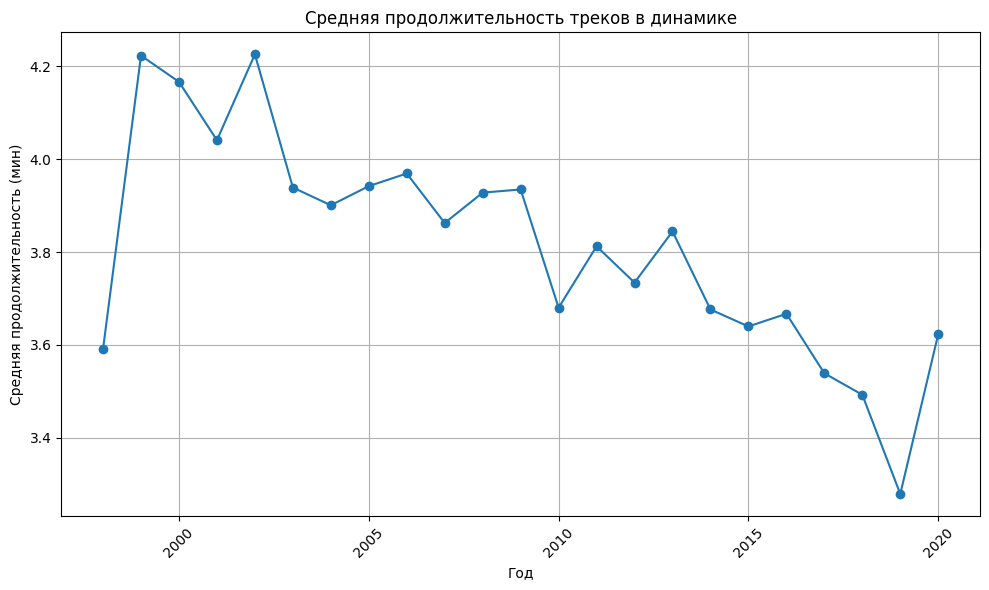

In [59]:
plt.figure(figsize=(10, 6))
average_duration_by_year.plot(marker='o', linestyle='-')
plt.title('Средняя продолжительность треков в динамике')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (мин)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Как можно заметить, продолжительность хитов так или иначе снижается с годами

Одна из переменных, которую мы далее будем анализировать - популярность. Построим график плотности распределения песен по попуулярности

<ipython-input-60-d4d543dfda18>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_spoti['popularity'], shade=True)


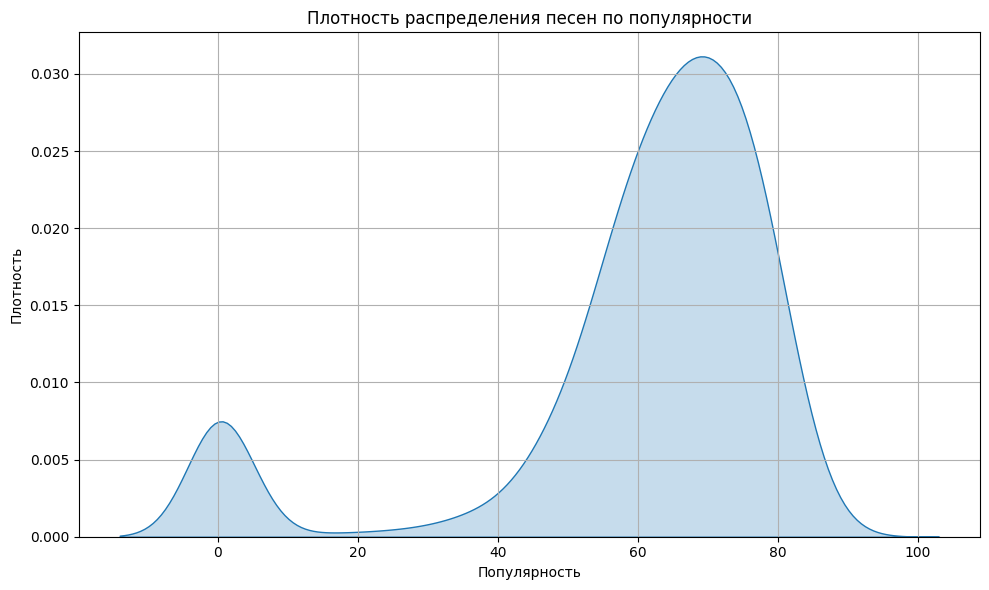

In [60]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_spoti['popularity'], shade=True)
plt.title('Плотность распределения песен по популярности')
plt.xlabel('Популярность')
plt.ylabel('Плотность')
plt.grid(True)
plt.tight_layout()
plt.show()

Распределение песен по популярности имеет вид, похожий на нормальное распределение, однако есть различия вроде сдвига вправо и фактически "двух" таких распределений на одном графике

Далее посмотрим на два графика: танцевальнотси и энергичности относительно популярности

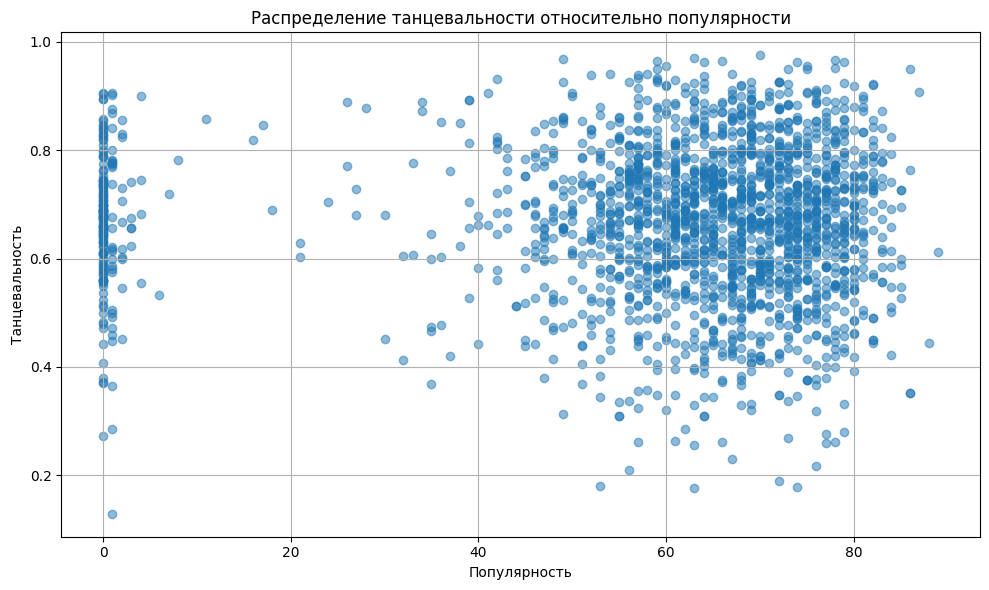

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df_spoti['popularity'], df_spoti['danceability'], alpha=0.5)
plt.title('Распределение танцевальности относительно популярности')
plt.xlabel('Популярность')
plt.ylabel('Танцевальность')
plt.grid(True)
plt.tight_layout()
plt.show()

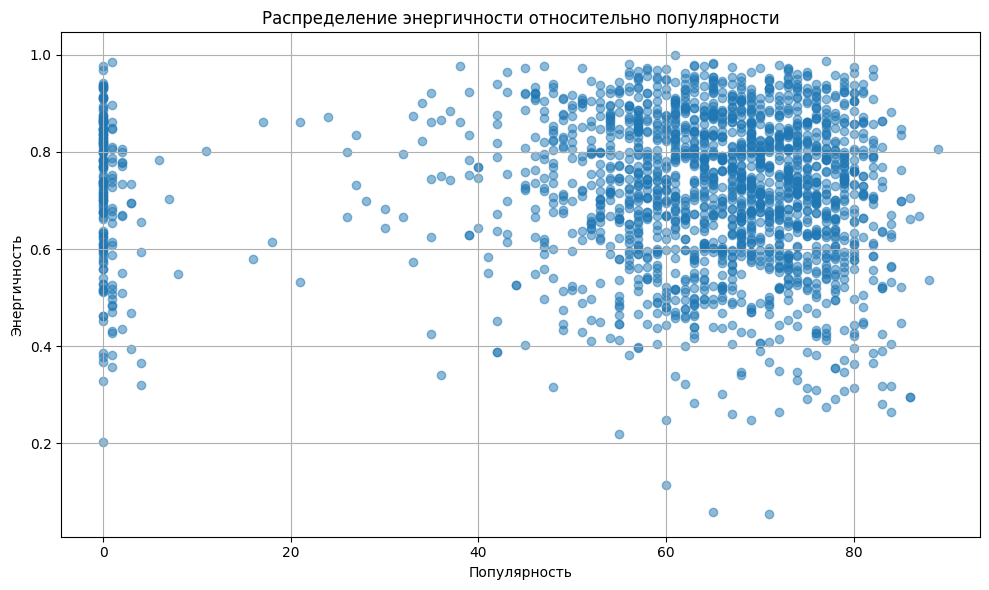

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df_spoti['popularity'], df_spoti['energy'], alpha=0.5)
plt.title('Распределение энергичности относительно популярности')
plt.xlabel('Популярность')
plt.ylabel('Энергичность')
plt.grid(True)
plt.tight_layout()
plt.show()

Эти графики очень схожи между собой: одно облако рассеивания, однако выбросы имеют место

Построим график распределения танцевальности относительно громкости

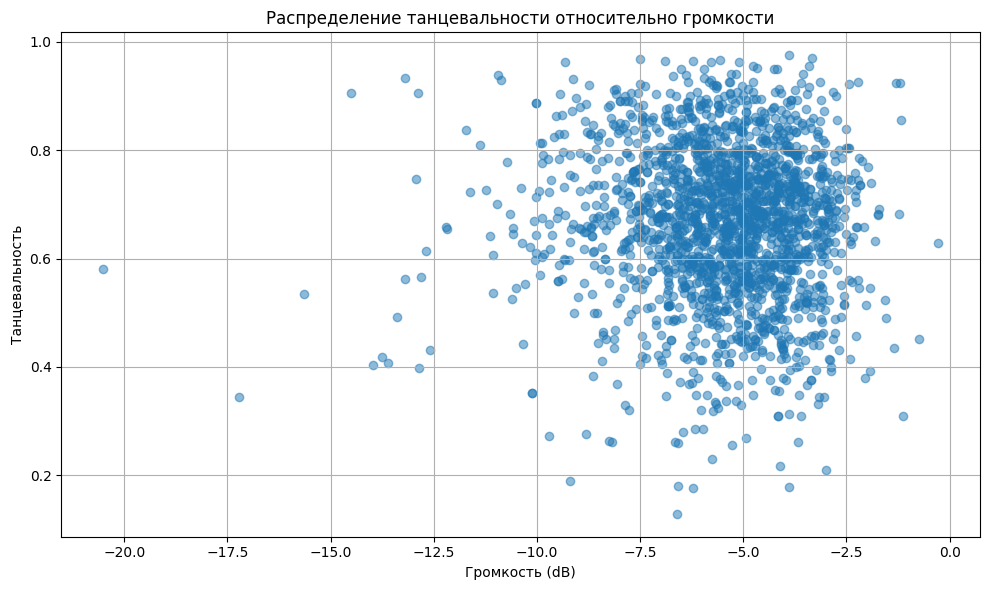

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df_spoti['loudness'], df_spoti['danceability'], alpha=0.5)
plt.title('Распределение танцевальности относительно громкости')
plt.xlabel('Громкость (dB)')
plt.ylabel('Танцевальность')
plt.grid(True)
plt.tight_layout()
plt.show()

На данном графике гораздо меньше выбросов, чем на прошлых, возможно, связь десь более тесная, что в будущем поможет при проверке гипотезы.